# Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Upload dataset
housing = pd.read_csv('housing data.csv', header=None) 
housing

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### Observacions

Tenim 14 columnes i 506 files. Aquest dataframe ens mostra una serie de valors que explicarem més endevant.
Falten els noms de les columnes cosa que podem sol·lucionar amb l'arxiu txt que ens han subministrat.
Un cop veiem els noms de les columnes, podem veure que la variable CHAS és una variable categorica convertida a dummie.
**És un dataset sobre els habitatges a Boston**

#### Què fer abans de treballar amb el df

1. Posar els noms de les columnes amb la informació de l'arxiu txt.
2. Petita descripció de les variables i quin tipus de dada haurien de ser.
3. Comprovar que el tipus de dades (dtypes) son els correctes per cada variable.
4. Assegurar-nos que no hi ha Nulls, Nans ni valors duplicats.

#### 1. Posar els noms de les columnes amb la informació de l'arxiu txt.

In [2]:
# We update the columns with the variables name and show the firs 10 rows
housing.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


1. **Crim (_float_)**: taxa de delinqüència per capita per ciutat
2. **ZN (_float o int_)**: proporció de sòl residencial zonificar per a lots de mes de 25000 m2
3. **INDUS (_float_)**: proporció d'hectàrees comercials no inoristes per ciutat
4. **CHAS (_int_)**: variable ficticia Charles River (=1 si el tram limita el riu, 0 en cas contrari)
5. **NOX (_float_)**: concentració d'òxids nitrics (parts per 10 millons)
6. **RM (_float_)**: promig del número d'habitacions per habitatge
7. **AGE (_float_)**: proporció d'unitats ocupades pel propietari construides abans de 1940
8. **DIS (_float_)**: distancies ponderades fins a cinc centres d'ocupació de Boston
9. **RAD (_int_)**: index d'accessibilitat a les carreteres radials
10. **TAX (_int o float_)**: taxa d'impost sobre béns inmobles de valor total per 10.000
11. **PTRATIO (_float_)**: ràtio d'alumnes-professor per minicipi
12. **B (_float_)**: 1000(Bk - 0,63)^2 on Bk és la proporció de negres per ciutat
13. **LSTAT (_float_)**: % d'estatus inferior de la població
14. **MEDV (_float_)**: valor mitjà de les cases ocupades pel propietari en 1000 dolars	

In [3]:
# Chech the info of our dataset whiche tell us how many No Nulls are and the dtypes of thw columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


_En principi no hi ha nulls i els dtypes estan tots correctes_
#### 3. Comprovem que no hi hagi ni NaNs ni Nulls ni duplicats (Nulls hem vist anteriormente que no n'hi ha).

In [4]:
# Check NaNs
housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
# Check duplicates
housing.duplicated().sum()

0

_El dataframe sembla que **NO** conté **Nulls, NaNs ni dupliacts**. Dic sembla perquè sempre ens podem trobar anomalies o errors humans un cop estudiem la data més a fons._

### Preprocessat

Haurem d'estudiar la nostra dada per saber quin tipus de data tenim i prepar-la per poder-la utilitzar en els nostres models de machine learning.

In [6]:
# We sill see if they have Gaussian distribution
from scipy import stats
from scipy.stats import shapiro

print("Nul Hipotesis (H0): The sample has a normal distribution (Probably Gaussian).")
print("Alternative Hipotesis (H1): The sample has NOT have a normal distribution (Probably NOT Gaussian).\n")

for i in housing.columns:
    shapiro_test = stats.shapiro(housing[i])
    print("The variable", i, "has a \033[1mP-value\033[0m of", "\033[1m", shapiro_test.pvalue, "\033[0m")
    if shapiro_test.pvalue > 0.05:
        print("Nul hipotesis is accepted, The sample has a normal distribution \033[1m(Probably Gaussian)\033[0m.\n")
    else:
        print("Nul hipotesis is rejected, The sample has NOT a normal distribution \033[1m(Probably NOT Gaussian)\033[0m.\n")

Nul Hipotesis (H0): The sample has a normal distribution (Probably Gaussian).
Alternative Hipotesis (H1): The sample has NOT have a normal distribution (Probably NOT Gaussian).

The variable CRIM has a P-value of  1.3285678005931464e-36 
Nul hipotesis is rejected, The sample has NOT a normal distribution (Probably NOT Gaussian).

The variable ZN has a P-value of  7.882576753156324e-34 
Nul hipotesis is rejected, The sample has NOT a normal distribution (Probably NOT Gaussian).

The variable INDUS has a P-value of  1.0642375893751083e-17 
Nul hipotesis is rejected, The sample has NOT a normal distribution (Probably NOT Gaussian).

The variable CHAS has a P-value of  2.350467979135232e-40 
Nul hipotesis is rejected, The sample has NOT a normal distribution (Probably NOT Gaussian).

The variable NOX has a P-value of  5.775851259944009e-14 
Nul hipotesis is rejected, The sample has NOT a normal distribution (Probably NOT Gaussian).

The variable RM has a P-value of  2.4107271734408187e-10 

<Figure size 640x480 with 0 Axes>

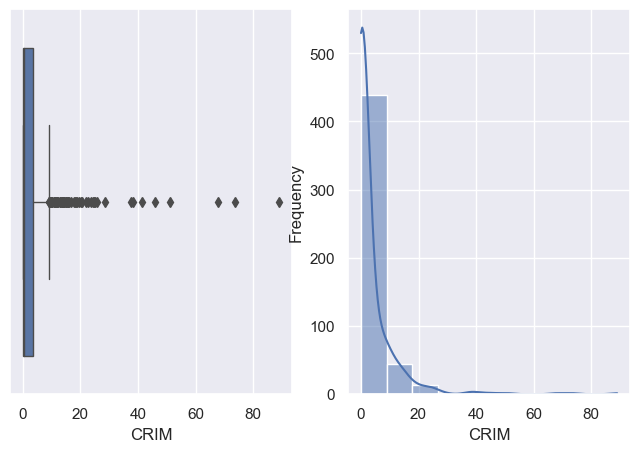

<Figure size 800x500 with 0 Axes>

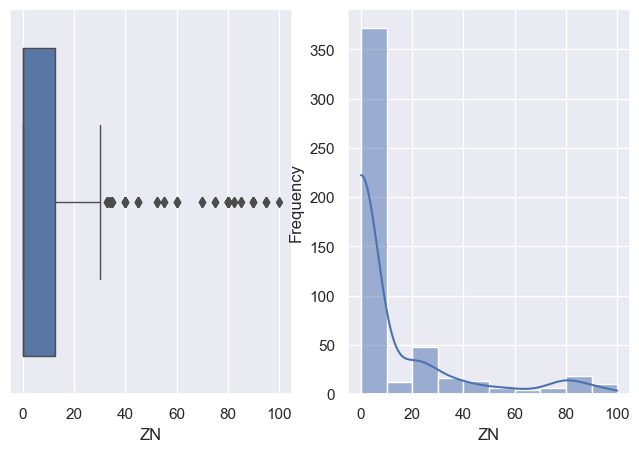

<Figure size 800x500 with 0 Axes>

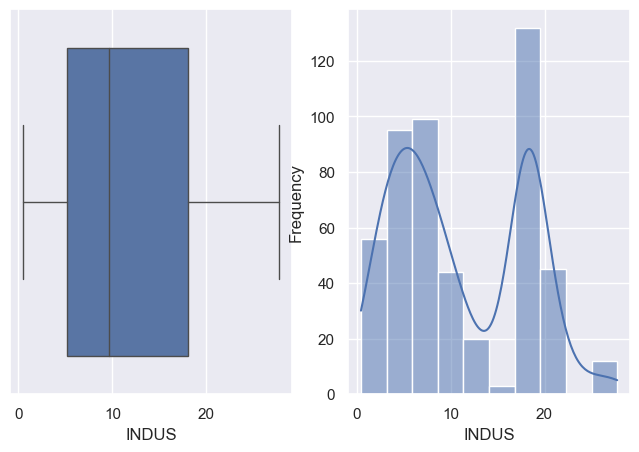

<Figure size 800x500 with 0 Axes>

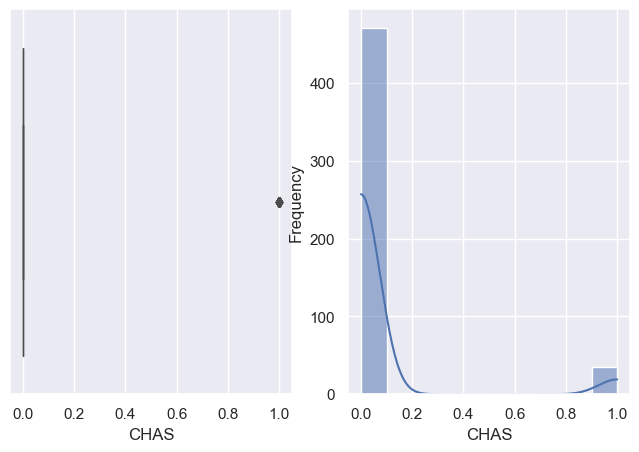

<Figure size 800x500 with 0 Axes>

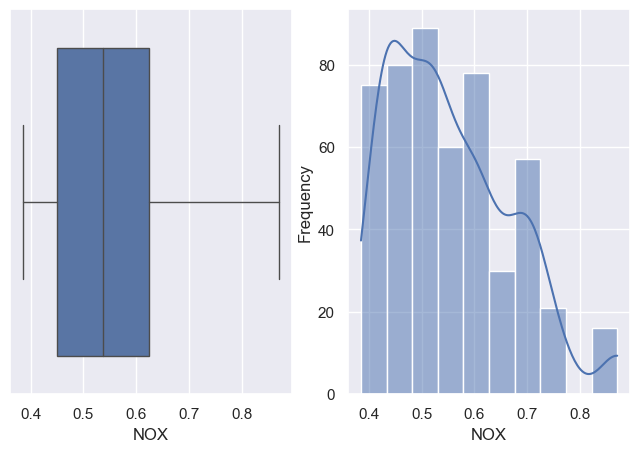

<Figure size 800x500 with 0 Axes>

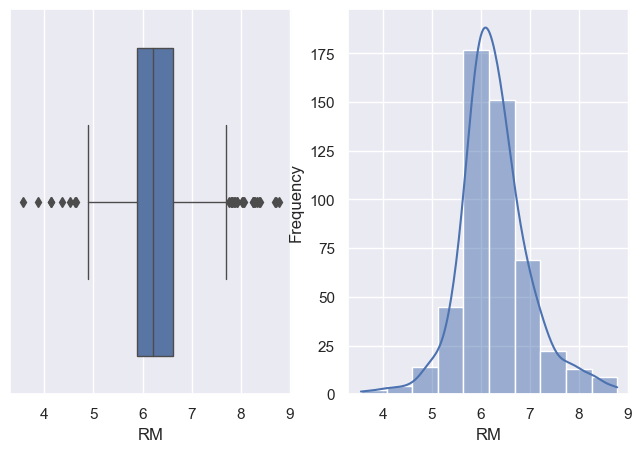

<Figure size 800x500 with 0 Axes>

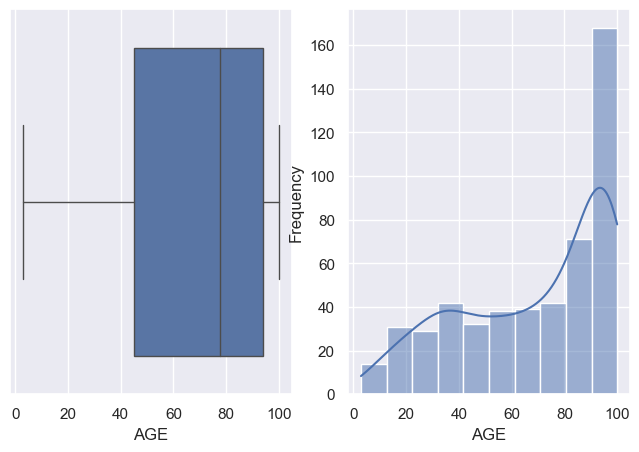

<Figure size 800x500 with 0 Axes>

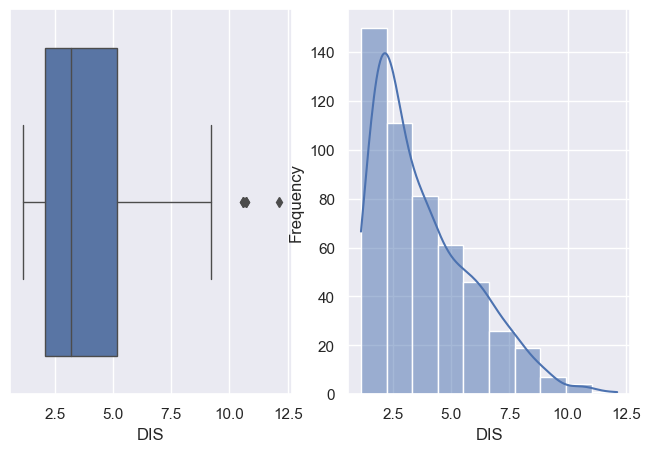

<Figure size 800x500 with 0 Axes>

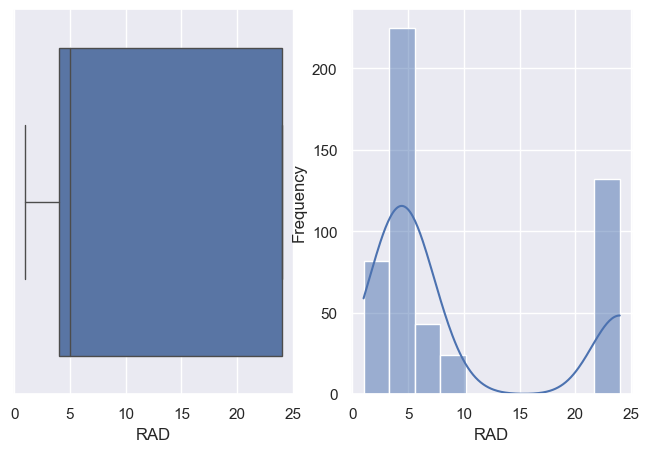

<Figure size 800x500 with 0 Axes>

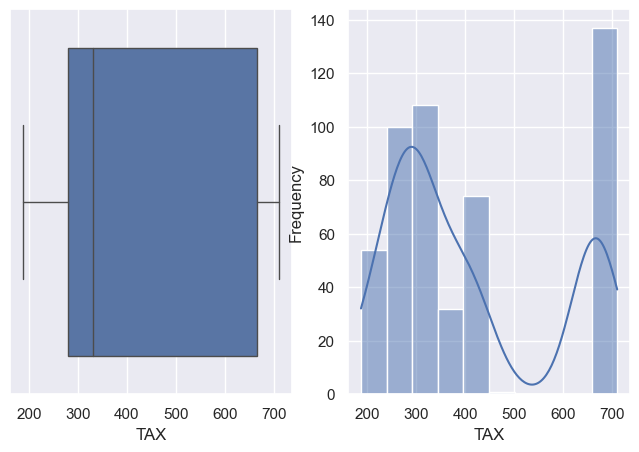

<Figure size 800x500 with 0 Axes>

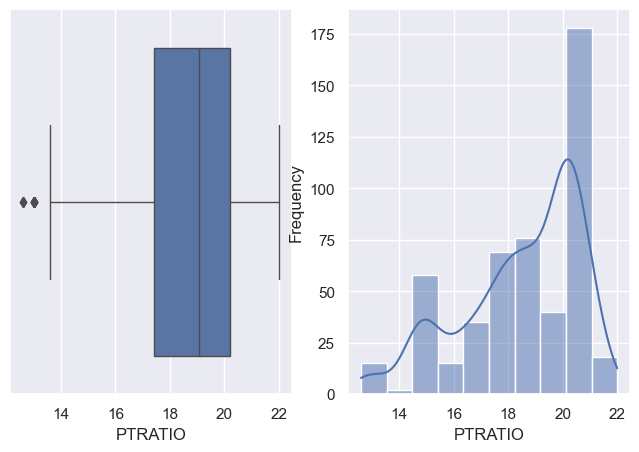

<Figure size 800x500 with 0 Axes>

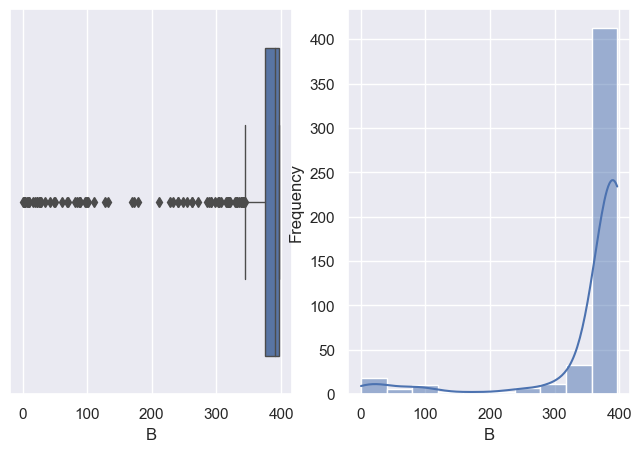

<Figure size 800x500 with 0 Axes>

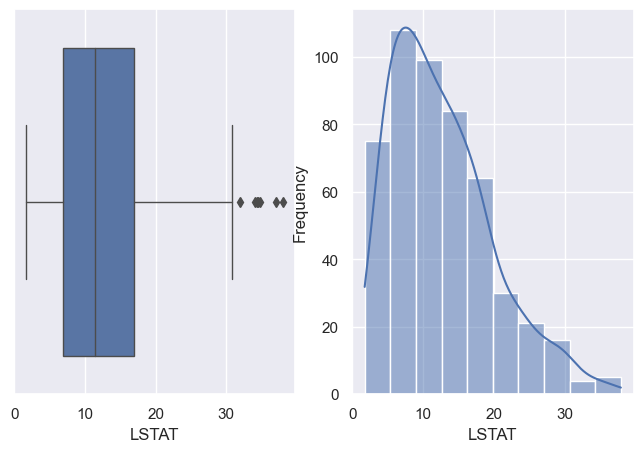

<Figure size 800x500 with 0 Axes>

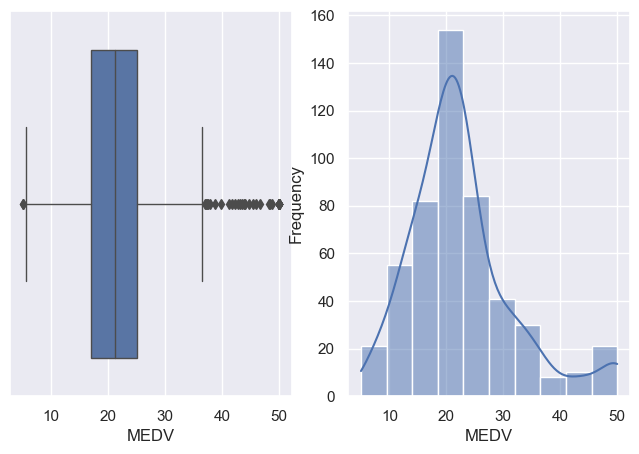

In [7]:
#Grafiquem les variables per veure els outliers utilitzant boxplot
for i in housing.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(1, 2, sharex=True)
    plt.gca().set(xlabel=i, ylabel='Frequency')
    sns.boxplot(housing[i], ax=ax_box, linewidth=1, orient='v')
    sns.histplot(housing[i], ax=ax_hist, bins=10, kde=True)
plt.show()

### Tipus de variables que tenim:

Primer, hem de dir que MEDV és la nostra variable objectiu que volem predir per tant no cal preprocessar-la.in preprocessed.

Després de fer l'estudi del tipus de variable que tenim amb un test d'hipotesi i amb l'ajuda dels gràfics per veure outliers, podem observar el següent:
1. **CHAS** és una variable categorica que ja ha estat convertida en dummie, per tant **no cal fer res**.
2. **RAD** es tracta d'un index, per tant la podem convertir en un **dummie** perque el seu valor sigui 0 o 1 i així centrem el seu valor com les altres variables. 
3. **RM**, tot i que la comprovació diu que probablement NO és Gaussiana, quan veiem el gràfic podem veure que si te una forma similar. Per tant farem una **PowerTransformer amb STD**. Cada columna tindra el seu valor excepte quan el valor era 1, que ara serà igual a 0, ja que utilitzarem el parametre d'eliminar la primera columna.
4. **LSTAT, B, PTRATIO, DIS, RM, ZN, CRIM**, son variables NO GAUSSIANES amb OUTLIERS per tant utilitzarem un **RobustScaler** variables are NOT GAUSSIAN with Outliers so we will use **RobustScaler**
5. **INDUS, NOX, AGE, TAX** son variables NO GAUSSIANES sense OUTLIERS per tant farem una normalització **MinMaxScaler**

In [8]:
#Import scikit-learn library
from sklearn import preprocessing

#We will need to do a dummie for RAD variable.
housing_trans = housing.copy()
housing_trans = pd.get_dummies(housing, columns=["RAD"], drop_first = True)

In [9]:
# Import library
from sklearn.preprocessing import PowerTransformer

#We will do Power Transformer with std
pt = PowerTransformer(method='box-cox', standardize=True)
housing_trans['RM'] = pt.fit_transform(housing_trans[['RM']])

<Figure size 800x500 with 0 Axes>

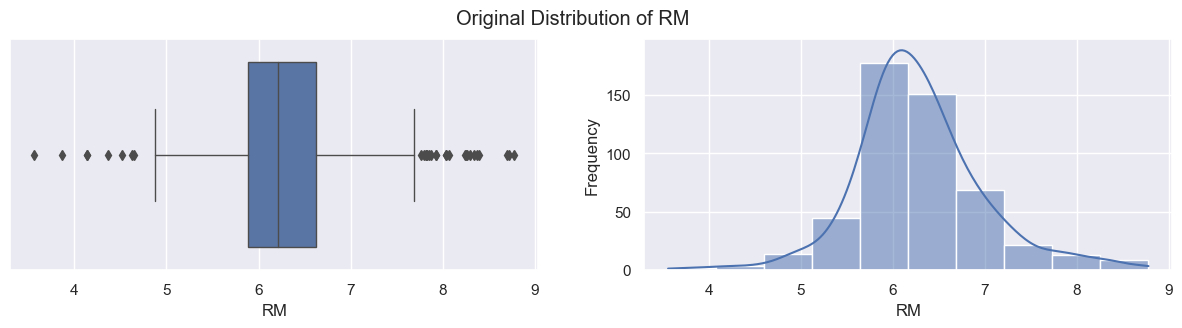

<Figure size 1500x300 with 0 Axes>

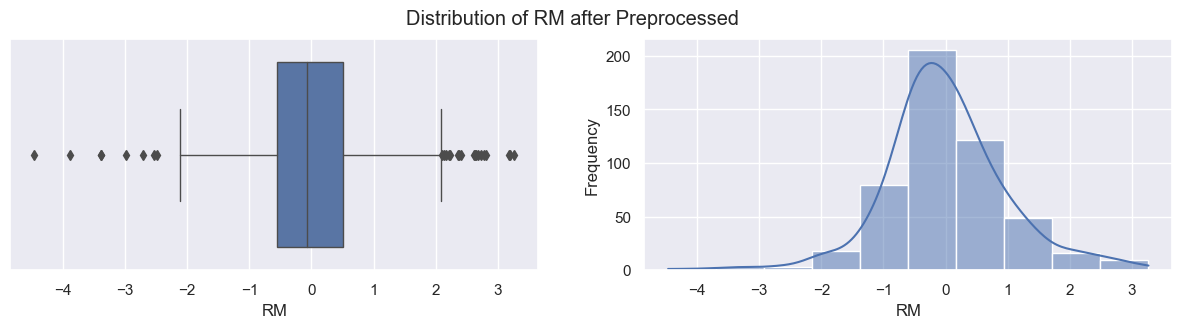

In [10]:
# Original graphic of variable RM
plt.figure()
plt.tight_layout()
sns.set(rc={"figure.figsize": (15, 3)})
f, (ax_box, ax_hist) = plt.subplots(1, 2, sharex=True)
plt.gca().set(xlabel='RM', ylabel='Frequency')
sns.boxplot(housing['RM'], ax=ax_box, linewidth=1, orient='v')
sns.histplot(housing['RM'], ax=ax_hist, bins=10, kde=True)
f.suptitle('Original Distribution of RM')
plt.show()

# Graphic of variable RM after doing PowerTransformer + STD
plt.figure()
plt.tight_layout()
sns.set(rc={"figure.figsize": (15, 3)})
f, (ax_box, ax_hist) = plt.subplots(1, 2, sharex=True)
plt.gca().set(xlabel='RM', ylabel='Frequency')
sns.boxplot(housing_trans['RM'], ax=ax_box, linewidth=1, orient='v')
sns.histplot(housing_trans['RM'], ax=ax_hist, bins=10, kde=True)
f.suptitle('Distribution of RM after Preprocessed')
plt.show()



_Podem observar que la estandarització s'ha fet correctament i la power transformatión potser ha modificat una mica la forma gaussiana de la variable RM però tampoc es pot contemplar en excés si comparem abans i després del preprocessat_

In [11]:
#We will do RobustScaler for variables NOT GAUSSIAN with Outliers
Robust_scaler = preprocessing.RobustScaler().fit(housing_trans[['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']])
housing_trans[['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']] = Robust_scaler.transform(housing_trans[['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']])

In [12]:
#We will do MinMax_Scaler for variables NOT GAUSSIAN without Outliers
MinMax_scaler = preprocessing.MinMaxScaler().fit(housing_trans[['INDUS', 'NOX', 'AGE', 'TAX']])
housing_trans[['INDUS', 'NOX', 'AGE', 'TAX']] = MinMax_scaler.transform(housing_trans[['INDUS', 'NOX', 'AGE', 'TAX']])

#We show now the first 10 rows of our df
housing_trans.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.067815,0,0.314815,0.490522,0.641607,0.285777,0.208015,-1.339286,...,-0.637681,24.0,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.242302,0,0.172840,0.286293,0.782698,0.569789,0.104962,-0.446429,...,-0.221889,21.6,1,0,0,0,0,0,0,0
2,-0.063760,0.00,0.242302,0,0.172840,1.274617,0.599382,0.569789,0.104962,-0.446429,...,-0.732634,34.7,1,0,0,0,0,0,0,0
3,-0.062347,0.00,0.063050,0,0.150206,1.038284,0.441813,0.924391,0.066794,-0.125000,...,-0.841579,33.4,0,1,0,0,0,0,0,0
4,-0.052144,0.00,0.063050,0,0.150206,1.226869,0.528321,0.924391,0.066794,-0.125000,...,-0.602699,36.2,0,1,0,0,0,0,0,0
5,-0.063048,0.00,0.063050,0,0.150206,0.298302,0.574665,0.924391,0.066794,-0.125000,...,-0.614693,28.7,0,1,0,0,0,0,0,0
6,-0.046792,1.00,0.271628,0,0.286008,-0.269582,0.656025,0.761936,0.236641,-1.375000,...,0.106947,22.9,0,0,0,1,0,0,0,0
7,-0.031143,1.00,0.271628,0,0.286008,-0.049716,0.959835,0.888221,0.236641,-1.375000,...,0.778611,27.1,0,0,0,1,0,0,0,0
8,-0.012592,1.00,0.271628,0,0.286008,-0.806476,1.000000,0.930835,0.236641,-1.375000,...,1.856072,16.5,0,0,0,1,0,0,0,0
9,-0.024053,1.00,0.271628,0,0.286008,-0.280659,0.854789,1.095977,0.236641,-1.375000,...,0.573713,18.9,0,0,0,1,0,0,0,0


### Split data into Train/Test

Ara que ja tenim fet el preprocessat, tenim les dades preparades per separar la base de dades en dos (les que utilizarem per entrenar i les que utilitzarem per avaluar) 

In [13]:
# We split our dataset in variables X (features) and y (target)
X = housing_trans.drop(['MEDV'], axis = 1)
y = housing_trans[['MEDV']]

# We import the library and model to split the data into Train and test df
from sklearn.model_selection import train_test_split

# We finally split the dataframe (75% data will be in training model, and the rest in test model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
# We check the shape of the split of the data
print("Features training shape :", X_train.shape, ". Target training shape:", y_train.shape)
print("Features test shape :", X_test.shape, ". Target test shape:", y_test.shape)

Features training shape : (379, 20) . Target training shape: (379, 1)
Features test shape : (127, 20) . Target test shape: (127, 1)


### Models 

Utilizarem els models de **Regressió linial** i de **SVR**

#### Model 1: Regressió Linial

In [15]:
# import model from library sklearn
from sklearn.linear_model import LinearRegression

# Create the model
lr = LinearRegression()

# Train the model 
lr.fit(X_train, y_train)

# Predict the model
y_pred_lr = lr.predict(X_test)
y_pred_lr[1:5].T

array([[18.242495  , 16.79158529, 35.13831066, 17.90213088]])

#### Model 2: Suport de màquines vectorials

In [16]:
# import model from library sklearn
from sklearn.svm import SVR

# Create the model
svr = SVR()

# Train the model 
svr.fit(X_train, y_train)

# Predict the model
y_pred_svr = svr.predict(X_test)
y_pred_svr[1:5].T

array([16.77882736, 21.78073374, 30.84186084, 16.92557494])

# Exercici 2
Compara’ls en base al MSE i al R2.


In [17]:
# import libraries
from sklearn.metrics import r2_score, mean_squared_error

# Calculate MSE and R2 of LR
MSE_lr = mean_squared_error(y_test, y_pred_lr)
R2_lr = r2_score(y_test, y_pred_lr)

# Calculate MSE and R2 of SVR
MSE_svr = mean_squared_error(y_test, y_pred_svr)
R2_svr = r2_score(y_test, y_pred_svr)

# Create a table with the comparasion of the metrics
metrics = pd.DataFrame(data = [['LinealRegression', MSE_lr, R2_lr], ['SupportVectorRegression', MSE_svr, R2_svr]], columns = ['Model', 'MSE', 'R2'])

# Show the comparasion table
metrics.set_index(['Model'])

,MSE,R2
Model,,
LinealRegression,22.833275,0.575007
SupportVectorRegression,16.258810,0.697377


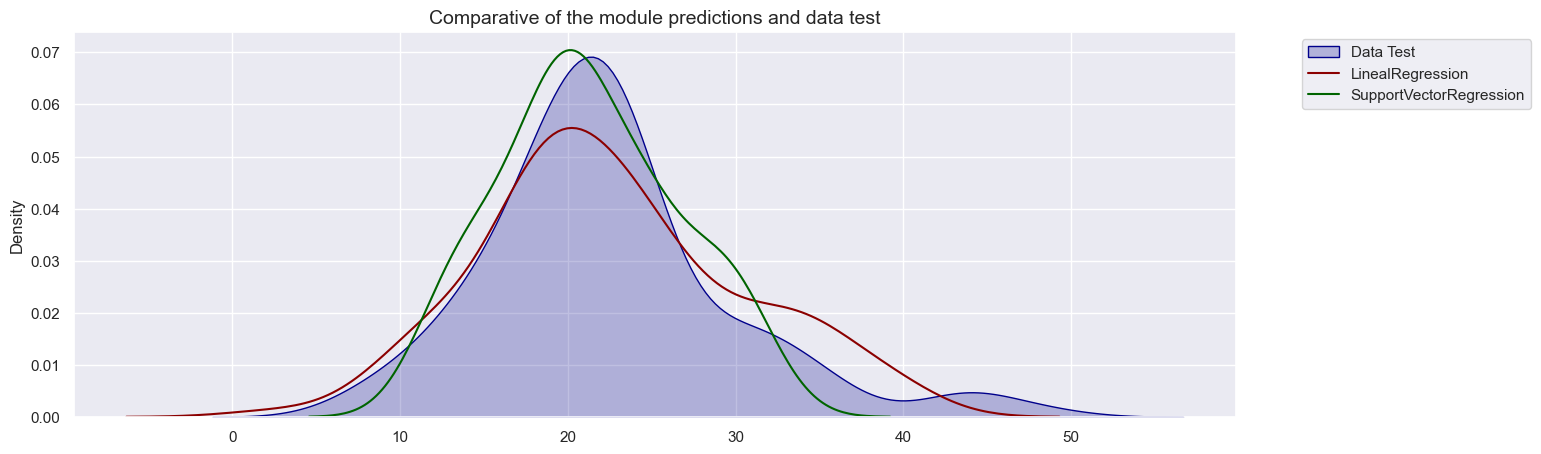

In [18]:
# plot for avaluation the models
y_test = np.array(y_test).ravel()
y_pred_lr = y_pred_lr.ravel() 
y_pred_svr = y_pred_svr.ravel()

sns.set(rc={"figure.figsize": (15, 5)})
sns.kdeplot(y_test, label='Data Test', color='Darkblue', fill=True)
sns.kdeplot(y_pred_lr, label='LinealRegression', color='Darkred', fill=False)
sns.kdeplot(y_pred_svr, label='SupportVectorRegression', color='Darkgreen', fill=False)

plt.title("Comparative of the module predictions and data test", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Conclusions**:  
El model de Regressió linial fa millors prediccions que el SVR el qual veiem que te un resultat molt pobre. Cal tenir en compte que estem treballant una base de dades amb poques observacions en total (506) de les cuals 379 les hem utilitzat per entrenar dels models i 127 per comprovar l'efectivitat d'aquests.  
També ho podem observar amb el gràfic on veiem que la línia vermella (LR) s'ajusta més a l'àrea sombrejada blava (Data test)

# Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.
Hi ha dos maneres per intentar millorar la predicció a través els parametres, per una banda el GridSearch que busca el millor hiperparametre per un model donat. 

#### Regressió Linial

In [19]:
print("Paràmetres usats en LR: \n", lr.get_params())

Paràmetres usats en LR: 
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [20]:
# Import model
from sklearn.model_selection import GridSearchCV

# Create a dict with parameters options, we will not add normalize as it advice as to not use it (deprecated)
param_lr = {'copy_X': (True, False),
            'fit_intercept': (True, False),
            'n_jobs': (-1, None, 1),
            'positive': (True, False)}

# Apply GridSearch
gs_lr = GridSearchCV(lr, param_lr)

# Find the result of GS
result_lr = gs_lr.fit(X_train, y_train)

# Print the best parameters for LR to improve the model.
print("Els millors hiperparameteres per LR son:", result_lr.best_params_)

Els millors hiperparameteres per LR son: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}


In [21]:
# Improve our model with the only parameter that has changed
lr_best = LinearRegression(n_jobs=-1)
lr_best.fit(X_train, y_train)
y_pred_lr_best = lr_best.predict(X_test)
MSE_lr_best = mean_squared_error(y_test, y_pred_lr_best)
R2_lr_best = r2_score(y_test, y_pred_lr_best)

print("MSE_lr_best:", MSE_lr_best, "\nR2_lr_best:", R2_lr_best)

MSE_lr_best: 22.833275176096688 
R2_lr_best: 0.5750071682865561


#### Suport de màquines vectorials

In [22]:
print("Paràmetres usats en SVR: \n", svr.get_params())

Paràmetres usats en SVR: 
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [23]:
# Create a dict with parameters options, parameters not included has a little or 0 impact to the accuracy of the model
param_svr = {'C': [1, 5, 10], 
             'coef0': [0.0, 0.5, 1],  
             'degree': [3, 5, 8], 
             'epsilon': [0.1, 0.2, 0.5], 
             'gamma': ('scale', 'auto'),
             'kernel': ('rbf', 'linear', 'rbf', 'sigmoid')}
                
# Apply GridSearch
gs_svr = GridSearchCV(svr, param_svr)

# Find the result of GS
result_svr = gs_svr.fit(X_train, y_train)

# Print the best parameters for LR to improve the model.
print("Els millors hiperparameteres per svr son:", result_svr.best_params_)

Els millors hiperparameteres per svr son: {'C': 10, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}


In [24]:
# Improve our model with the only parameter that has changed
svr_best = SVR(C=10, epsilon=0.5, gamma='auto')
svr_best.fit(X_train, y_train)
y_pred_svr_best = svr_best.predict(X_test)
MSE_svr_best = mean_squared_error(y_test, y_pred_svr_best)
R2_svr_best = r2_score(y_test, y_pred_svr_best)

print("MSE_svr_best:", MSE_svr_best, "\nR2_svr_best:", R2_svr_best)

MSE_svr_best: 10.476737009523198 
R2_svr_best: 0.8049978334489877


In [25]:
# We add the results to our metrics table to compare the models improved
metrics_best = pd.DataFrame(data = [['LinealRegression_best', MSE_lr_best, R2_lr_best], ['SupportVectorRegression_best', MSE_svr_best, R2_svr_best]], columns = ['Model', 'MSE', 'R2'])
metrics = metrics.append(metrics_best, ignore_index=True)
metrics.set_index(['Model'])

,MSE,R2
Model,,
LinealRegression,22.833275,0.575007
SupportVectorRegression,16.258810,0.697377
LinealRegression_best,22.833275,0.575007
SupportVectorRegression_best,10.476737,0.804998


### Conclusions
En un primer moment el model de Regressió linial donava millor resultats  que el SVR segons les mètriques MSE i R2.  
Hem millorat els parametres amb l'ajuda de GridSearchCV per saber quins ens podrien aportar millor resultats:
   + En el cas lr_best no ens ha aportat cap tipus de millora ja que només millarava un dels parametres (n_jobs)
   + En el cas **svr_best** si que ha millorat notablement el model convertint-lo amb **el millor model** per ara.
   
# Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

In [26]:
# Import Cross Validation
from sklearn.model_selection import cross_val_score

# Calculate CV
cv_lr = cross_val_score(lr, X, y, cv=5, scoring='r2')
cv_svr = cross_val_score(svr, X, y, cv=5, scoring='r2')
cv_svr_best =cross_val_score(svr_best, X, y, cv=5, scoring='r2')

In [27]:
metrics.drop(2, inplace=True)

In [28]:
metrics = metrics.reset_index(drop=True)
metrics['R2 with CV'] = [cv_lr.mean(), cv_svr.mean(), cv_svr_best.mean()]
metrics

,Model,MSE,R2,R2 with CV
0,LinealRegression,22.833275,0.575007,0.306742
1,SupportVectorRegression,16.258810,0.697377,0.217852
2,SupportVectorRegression_best,10.476737,0.804998,0.478478


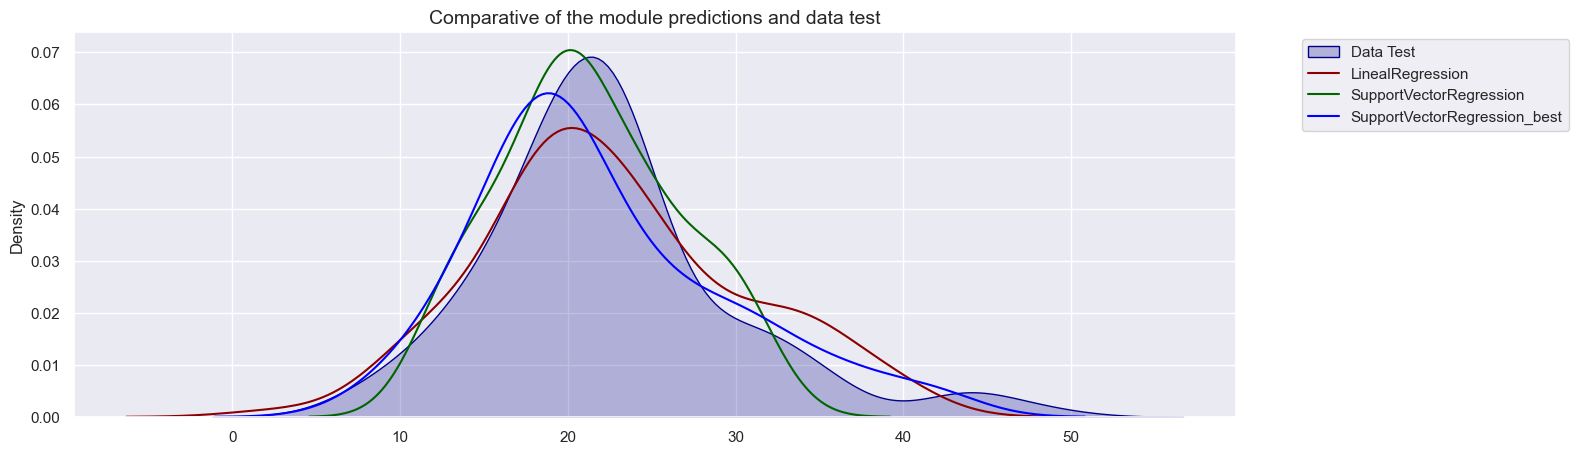

In [29]:
# plot for avaluation the models

sns.set(rc={"figure.figsize": (15, 5)})
sns.kdeplot(y_test, label='Data Test', color='Darkblue', fill=True)
sns.kdeplot(y_pred_lr, label='LinealRegression', color='Darkred', fill=False)
sns.kdeplot(y_pred_svr, label='SupportVectorRegression', color='Darkgreen', fill=False)
sns.kdeplot(y_pred_svr_best, label='SupportVectorRegression_best', color='blue', fill=False)

plt.title("Comparative of the module predictions and data test", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [30]:
# Calculate the correlation between RM and MEDV
print("La correlació entre RM i MEDV és:", housing['RM'].corr(housing['MEDV']).round(2))

La correlació entre RM i MEDV és: 0.7


_veiem que la correlació entre RM i MEDV del df original housing és bastant alta, del 70%. Per tant sí que és interessant veure com varia els models sense tenir en compte aquesta variable_

In [31]:
# drop RM variable
X_noRM = X.drop(['RM'], axis = 1)

In [32]:
# Split the dataframe (75% data will be in training model, and the rest in test model)
X_noRMtrain, X_noRMtest, y_noRMtrain, y_noRMtest = train_test_split(X_noRM, y, test_size=0.25)

In [33]:
# LinearRegression_noRM
lr_noRM = LinearRegression()
lr_noRM.fit(X_noRMtrain, y_noRMtrain)
y_pred_lr_noRM = lr_noRM.predict(X_noRMtest)
y_pred_lr_noRM[1:5].T

array([[16.39882576, 19.36046622, 22.84480777, 15.73352889]])

In [34]:
# SVR_noRM
svr_noRM = SVR()
svr_noRM.fit(X_noRMtrain, y_noRMtrain)
y_pred_svr_noRM = svr_noRM.predict(X_noRMtest)
y_pred_svr_noRM[1:5].T

array([16.54434654, 19.78145247, 21.76742175, 16.32212655])

In [35]:
# SVR_best_noRM
svr_best_noRM = SVR(C=10, epsilon=0.5, gamma='auto')
svr_best_noRM.fit(X_noRMtrain, y_noRMtrain)
y_pred_svr_best_noRM = svr_best_noRM.predict(X_noRMtest)
y_pred_svr_best_noRM[1:5].T

array([14.19774157, 19.86494937, 21.53547719, 14.70279449])

In [36]:
# Calculate MSE, R2 and CV for model lr_noRM
MSE_lr_noRM = mean_squared_error(y_noRMtest, y_pred_lr_noRM)
R2_lr_noRM = r2_score(y_noRMtest, y_pred_lr_noRM)
cv_lr_noRM = cross_val_score(lr_noRM, X_noRM, y, cv=5, scoring='r2')

# Calculate MSE, R2 and CV for model svr_noRM
MSE_svr_noRM = mean_squared_error(y_noRMtest, y_pred_svr_noRM)
R2_svr_noRM = r2_score(y_noRMtest, y_pred_svr_noRM)
cv_svr_noRM = cross_val_score(svr_noRM, X_noRM, y, cv=5, scoring='r2')

# Calculate MSE, R2 and CV for model svr_best_noRM
MSE_svr_best_noRM = mean_squared_error(y_noRMtest, y_pred_svr_best_noRM)
R2_svr_best_noRM = r2_score(y_noRMtest, y_pred_svr_best_noRM)
cv_svr_best_noRM = cross_val_score(svr_best_noRM, X_noRM, y, cv=5, scoring='r2')

# We add the results to our metrics table to compare the models improved
metrics_noRM = pd.DataFrame(data = [['LinealRegression_noRM', MSE_lr_noRM, R2_lr_noRM, cv_lr_noRM.mean()], ['SupportVectorRegression_noRM', MSE_svr_noRM, R2_svr_noRM, cv_svr_noRM.mean()], ['SupportVectorRegression_best_noRM', MSE_svr_best_noRM, R2_svr_best_noRM, cv_svr_best_noRM.mean()]], columns = ['Model', 'MSE', 'R2', 'R2 with CV'])
metrics = metrics.append(metrics_noRM, ignore_index=True)

In [37]:
# Show the comparision table with all models (first, best parameters and without RM variable)
metrics.set_index(['Model'])

,MSE,R2,R2 with CV
Model,,,
LinealRegression,22.833275,0.575007,0.306742
SupportVectorRegression,16.258810,0.697377,0.217852
SupportVectorRegression_best,10.476737,0.804998,0.478478
LinealRegression_noRM,28.938319,0.684416,0.476486
SupportVectorRegression_noRM,53.719896,0.414164,0.071894
SupportVectorRegression_best_noRM,29.881483,0.674131,0.249868


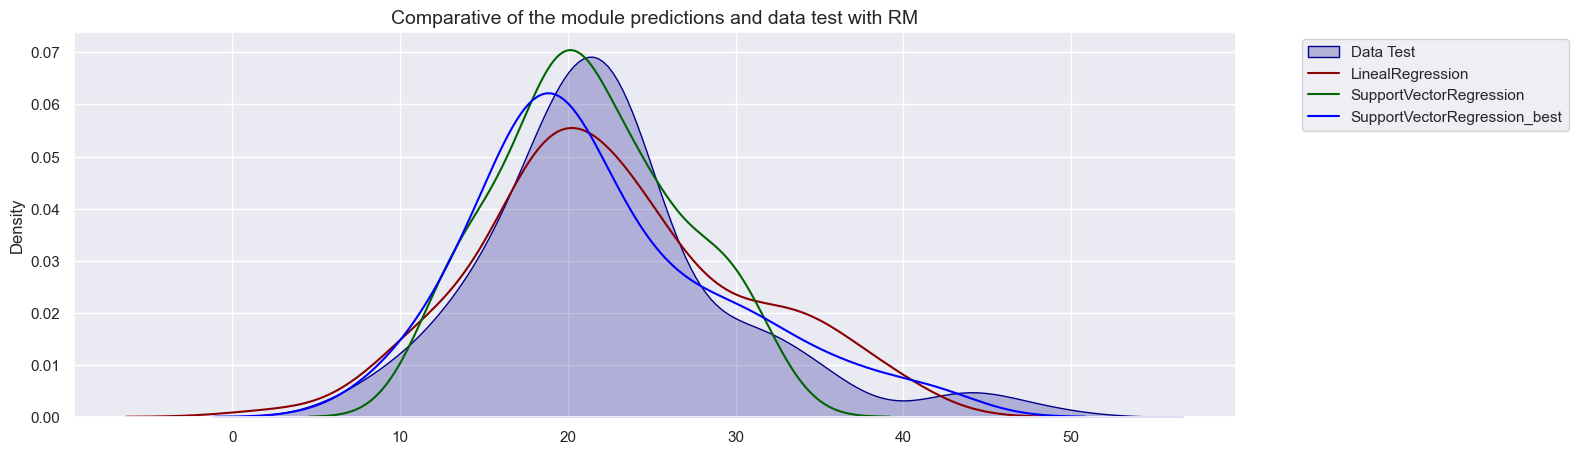

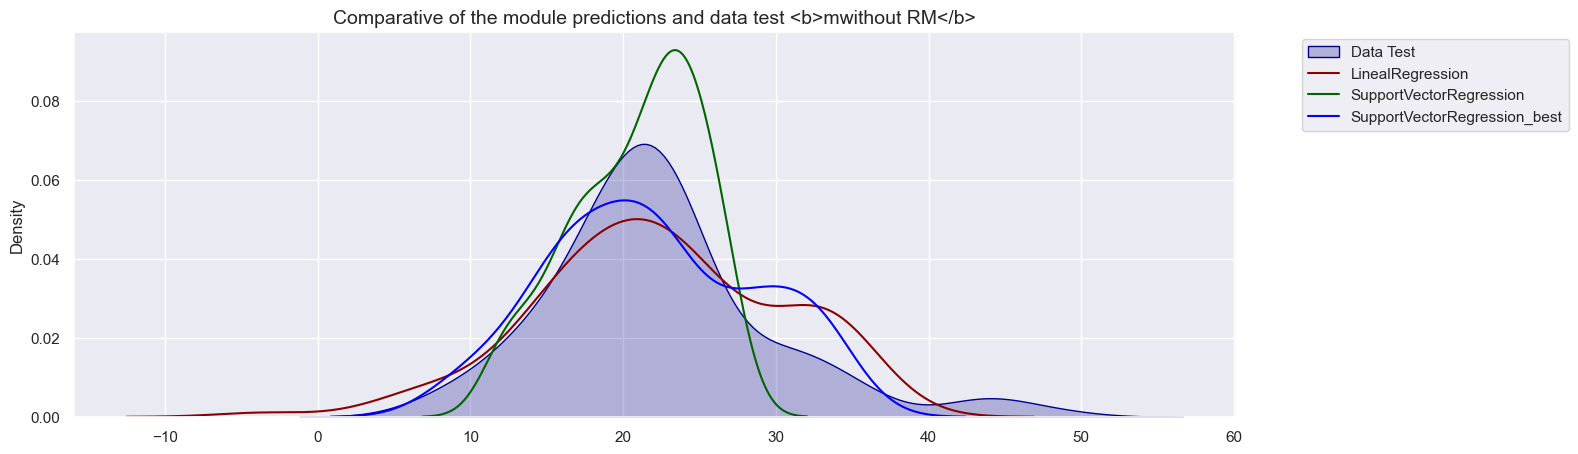

In [38]:
# plot comparision models with RM
y_test = np.array(y_test).ravel()
y_pred_lr = y_pred_lr.ravel() 
y_pred_svr = y_pred_svr.ravel()
y_pred_svr_best = y_pred_svr_best.ravel()

sns.set(rc={"figure.figsize": (15, 5)})
sns.kdeplot(y_test, label='Data Test', color='Darkblue', fill=True)
sns.kdeplot(y_pred_lr, label='LinealRegression', color='Darkred', fill=False)
sns.kdeplot(y_pred_svr, label='SupportVectorRegression', color='Darkgreen', fill=False)
sns.kdeplot(y_pred_svr_best, label='SupportVectorRegression_best', color='blue', fill=False)

plt.title("Comparative of the module predictions and data test with RM", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# plot without RM
y_noRMtest = np.array(y_noRMtest).ravel()
y_pred_lr_noRM = y_pred_lr_noRM.ravel() 
y_pred_svr_noRM = y_pred_svr_noRM.ravel()
y_pred_svr_best_noRM = y_pred_svr_best_noRM.ravel()

sns.set(rc={"figure.figsize": (15, 5)})
sns.kdeplot(y_test, label='Data Test', color='Darkblue', fill=True)
sns.kdeplot(y_pred_lr_noRM, label='LinealRegression', color='Darkred', fill=False)
sns.kdeplot(y_pred_svr_noRM, label='SupportVectorRegression', color='Darkgreen', fill=False)
sns.kdeplot(y_pred_svr_best_noRM, label='SupportVectorRegression_best', color='blue', fill=False)

plt.title("Comparative of the module predictions and data test <b>mwithout RM</b>", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Conclusions:

Hem vist al començament que hi havia una correlació bastant evident entre RM i el nostre target MEDV del 0.7. Per tant semblava obvi que ometre aquest input afectaria al nostre model.  
Tot i això, tot i que el model amb millors parametres si que es nota molt la diferència amb els models de SVR, per altra banda veiem que el model de Regressió lineal varia, pero no podem assegurar quin és millor. Ja que per una banda tenim un R2 superior sense la feature RM però en canvi la mètrica MSE te un millor valor (més petit).  
Gràficament sí que s'observa que els models amb RM predeixen més similar a la data extreta pel test.

Això em fa plantejar, _si treiem les variables que es correlacionen menys amb el nostre target obtindrem uns millors resultats?_

